# Funciones de Distribución de Probabilidad

## Distribución Uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
a = 1
b = 100
n = 100000
data = np.random.uniform(a, b, n)

(array([ 9932., 10028.,  9881.,  9971.,  9979., 10070., 10166.,  9921.,
         9993., 10059.]),
 array([ 1.00048506, 10.90007091, 20.79965676, 30.6992426 , 40.59882845,
        50.49841429, 60.39800014, 70.29758598, 80.19717183, 90.09675767,
        99.99634352]),
 <BarContainer object of 10 artists>)

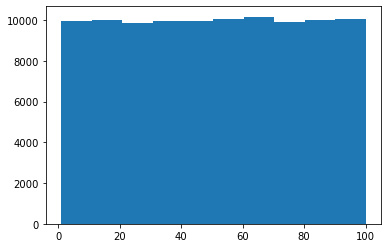

In [14]:
plt.hist(data)

## Distribución Normal

In [19]:
data = np.random.randn(100000)

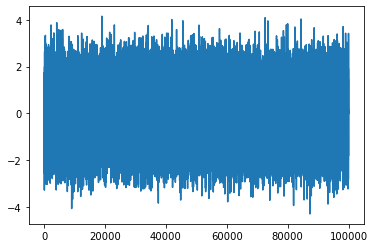

In [20]:
x = range(1,100001)
plt.plot(x, data)

(array([2.1000e+01, 4.2500e+02, 3.3590e+03, 1.4095e+04, 2.9327e+04,
        3.0791e+04, 1.6779e+04, 4.5320e+03, 6.2300e+02, 4.8000e+01]),
 array([-4.31074675, -3.46412633, -2.61750591, -1.7708855 , -0.92426508,
        -0.07764466,  0.76897576,  1.61559617,  2.46221659,  3.30883701,
         4.15545743]),
 <BarContainer object of 10 artists>)

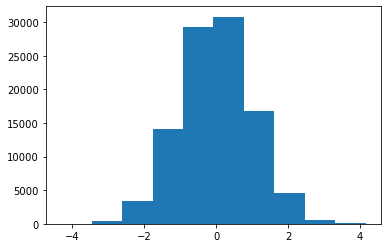

In [21]:
plt.hist(data)

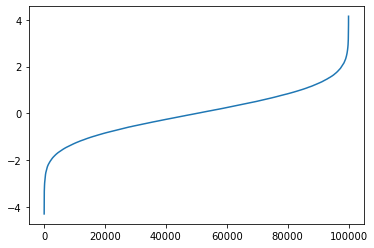

In [22]:
plt.plot(x, sorted(data))

(array([  3.,  19.,  62., 181., 282., 223., 144.,  62.,  19.,   5.]),
 array([-2.62334528, -0.96136685,  0.70061159,  2.36259003,  4.02456846,
         5.6865469 ,  7.34852534,  9.01050377, 10.67248221, 12.33446065,
        13.99643909]),
 <BarContainer object of 10 artists>)

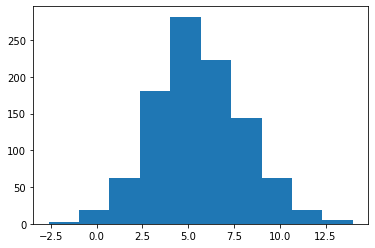

In [23]:
mu = 5.5
sd = 2.5
data = mu + sd * np.random.randn(1000)
plt.hist(data)

In [24]:
data = np.random.randn(2, 4)
data

array([[-0.70699266, -0.40921748, -0.56948235, -0.32078793],
       [ 0.37415739,  0.49608644,  1.05960658, -0.75775155]])

## La Simulación de Monte Carlo

* Generar 2 números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces
* Calcular x * x + y * y
    * Si el valor es inferior a 1 -> estamos dentro del circulo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calcular el numero total de veces que están dentro del circulo y se divide entre el número total de intentos para obtener una aproximación de de la probabilidad de caer dentro del circulo
* Usar dicha probabilidad para aproximar el valor de pi
* Repetir el experimento un número suficiente de veces (100) para obtener diferenres aproximaciones de pi.
* Calcular el promedio de los 100 experimentos anteriores para dar un valor final de pi.

In [30]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg / n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.142302000000002


(3.142302000000002, [<matplotlib.lines.Line2D at 0x27e25a56550>])

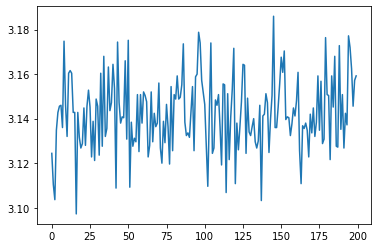

In [32]:
pi_montecarlo(10000, 200)

## Dummy Datasets

In [5]:
# Generación de Dummy Datasets con diferentes distribuciones
n = 10000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)
    }
)

In [6]:
data.head()

,A,B,C
0,-1.207611,2.368859,6.048706
1,1.526903,2.605565,31.071707
2,0.410613,4.813487,26.169207
3,-2.642170,-0.004141,6.301457
4,-1.390732,2.883160,9.993429


In [7]:
data.describe()

,A,B,C
count,10000.000000,10000.000000,10000.000000
mean,-0.015867,1.517101,18.613398
std,0.990075,2.500210,7.811248
min,-3.643334,-8.331216,5.000704
25%,-0.693483,-0.204693,11.885496
50%,-0.018571,1.530351,18.686055
75%,0.643283,3.224936,25.407494
max,3.675405,11.905507,31.992100


(array([  21.,  125.,  566., 1710., 2718., 2700., 1500.,  518.,  133.,
           9.]),
 array([-3.6433342 , -2.91146025, -2.17958629, -1.44771234, -0.71583838,
         0.01603557,  0.74790953,  1.47978349,  2.21165744,  2.9435314 ,
         3.67540535]),
 <BarContainer object of 10 artists>)

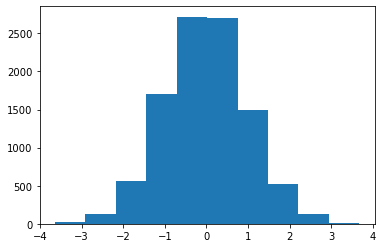

In [8]:
plt.hist(data['A'])

(array([   6.,   94.,  554., 1796., 2980., 2740., 1408.,  374.,   43.,
           5.]),
 array([-8.33121643, -6.30754413, -4.28387184, -2.26019955, -0.23652725,
         1.78714504,  3.81081734,  5.83448963,  7.85816193,  9.88183422,
        11.90550651]),
 <BarContainer object of 10 artists>)

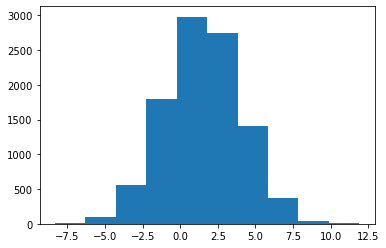

In [9]:
plt.hist(data['B'])

(array([ 988.,  999.,  951.,  974., 1018.,  984., 1040.,  988., 1035.,
        1023.]),
 array([ 5.00070406,  7.69984367, 10.39898329, 13.09812291, 15.79726252,
        18.49640214, 21.19554175, 23.89468137, 26.59382099, 29.2929606 ,
        31.99210022]),
 <BarContainer object of 10 artists>)

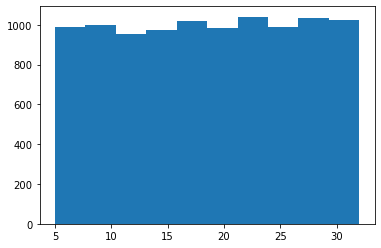

In [10]:
plt.hist(data['C'])

In [12]:
data = pd.read_csv('../datasets/customer-churn-model/Customer Churn Model.txt')
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [13]:
column_names = data.columns.values.tolist()

In [16]:
a = len(column_names)
new_data = pd.DataFrame(
    {
        'Column Name' : column_names,
        'A' : np.random.randn(a),
        'B' : 1.5 + 2.5 * np.random.randn(a),
        'C' : np.random.uniform(5,32,a)
    }, index = range(42,42 + a)
)

In [17]:
new_data

,Column Name,A,B,C
42,State,-1.452765,-0.896969,9.319853
43,Account Length,1.044550,-2.538347,6.934653
44,Area Code,-0.019533,6.758183,14.256041
45,Phone,-0.763585,4.180381,18.535334
46,Int'l Plan,2.100225,-0.522134,9.956971
47,VMail Plan,0.739076,3.637447,17.685162
48,VMail Message,0.829742,-0.776411,31.910002
49,Day Mins,0.606550,4.241416,12.188451
50,Day Calls,2.206121,-0.607268,10.575141
51,Day Charge,-1.262312,2.980610,6.892955
